In [1]:
from DataCollector import DataCollectorv2
from Dataset import DatasetHPs
from NNModel import NNModelHPs
from covit import CovitProject

In [2]:
dc = DataCollectorv2()

Building Data frame
Done building Data frame
Building remote dicts
Done building remote dicts
Building local dicts
Done building local dicts


In [3]:
covit = CovitProject(project_name="269Lins",
                     data_collector=dc)

In [4]:
#old_model = "nn1.5"
new_model = "nn2.2"

nnmodel_hps = NNModelHPs(
    encoder_repeats = 2,
    classes = 269,
    d_model = 256,
    d_val = 96,
    d_key = 96,
    d_ff = 1536,
    heads = 18,
    dropout_rate = 0.1
)

#covit.loadNNModel(old_model)

covit.addNNModel(name=new_model,
                 nnmodel_hps=nnmodel_hps)
# for _ in range(1):
#     covit.deepenNN(name=new_model,
#                    trainable=True)
# covit.makeTrainable(name=new_model)

2022-07-27 06:42:45.791034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-27 06:42:46.190405: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9201 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-07-27 06:42:47.311579: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


In [5]:
# new_layers_num = 
# covit.addNNModel(name=new_model,
#                  other=old_model)
# for i in range(new_layers_num):
#     covit.deepenNN(name=new_model)

In [ ]:
covit.train(new_model,
            epochs=20,
            batch_size=256,
            mini_batch_size=128)

Epoch 1/20
1575/1575 [==============================] - ETA: 0s - loss: 1.3790 - top1_accuracy: 0.7907 - top2_accuracy: 0.8707 - top5_accuracy: 0.9231INFO:tensorflow:Assets written to: ../Projects/269Lins/NNModels/nn2.2/nn/assets


INFO:tensorflow:Assets written to: ../Projects/269Lins/NNModels/nn2.2/nn/assets


1575/1575 [==============================] - 545s 328ms/step - loss: 1.3790 - top1_accuracy: 0.7907 - top2_accuracy: 0.8707 - top5_accuracy: 0.9231 - val_loss: 1.5256 - val_top1_accuracy: 0.7423 - val_top2_accuracy: 0.8306 - val_top5_accuracy: 0.9177
Epoch 2/20
 540/1575 [=========>....................] - ETA: 5:08 - loss: 1.0612 - top1_accuracy: 0.8276 - top2_accuracy: 0.9040 - top5_accuracy: 0.9498

In [8]:
models = [
    new_model
         ]

for model in models:
    covit.loadNNModel(model)
    print("Model is {}".format(model))
    model_perf = covit.getResults(name=model).getPerf()
    val_min_loss = min(model_perf["val_loss"])
    val_min_idx = model_perf["val_loss"].index(val_min_loss)
    val_top1_max_acc = model_perf["val_top1_accuracy"][val_min_idx]
    print("===> val top1 accuracy = {}".format(val_top1_max_acc))

perf = {}
for model in models:
    covit.loadNNModel(model)
    model_perf = covit.getResults(name=model).getPerf()
    for metric in model_perf:
        if metric in perf:
            perf[metric].extend(model_perf[metric])
        else:
            perf.update({metric: model_perf[metric]})


Model is nn2.2
===> val top1 accuracy = 0.7831535339355469


40
valid top1 accuracy 0.7831535339355469
valid top2 accuracy 0.8769474625587463
valid top5 accuracy 0.9401564002037048


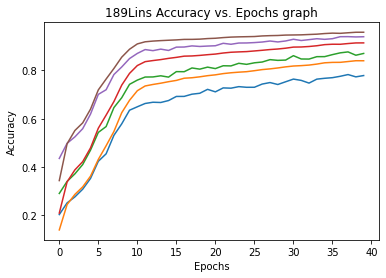

In [9]:
import matplotlib.pyplot as plt

plt.plot(perf["val_top1_accuracy"], label="valid top1 accuracy")
plt.plot(perf["top1_accuracy"], label="train top1 accuracy")
plt.plot(perf["val_top2_accuracy"], label="valid top2 accuracy")
plt.plot(perf["top2_accuracy"], label="train top2 accuracy")
plt.plot(perf["val_top5_accuracy"], label="valid top5 accuracy")
plt.plot(perf["top5_accuracy"], label="train top5 accuracy")

#plt.legend()


plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("189Lins Accuracy vs. Epochs graph")

plt.savefig("acc.png")

val_min_loss = min(perf["val_loss"])
val_min_idx = perf["val_loss"].index(val_min_loss)
val_top1_max_acc = perf["val_top1_accuracy"][val_min_idx]
val_top2_max_acc = perf["val_top2_accuracy"][val_min_idx]
val_top5_max_acc = perf["val_top5_accuracy"][val_min_idx]
print(len(perf["val_top1_accuracy"]))
print("valid top1 accuracy {}".format(val_top1_max_acc))
print("valid top2 accuracy {}".format(val_top2_max_acc))
print("valid top5 accuracy {}".format(val_top5_max_acc))



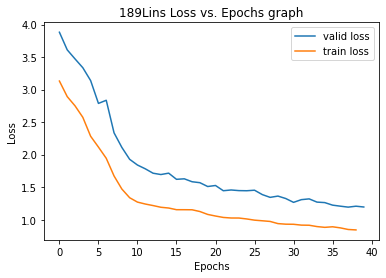

In [10]:
plt.plot(perf["val_loss"], label="valid loss")
plt.plot(perf["loss"][1:], label="train loss")

plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("189Lins Loss vs. Epochs graph")

plt.savefig("loss.png")

In [ ]:
for model in models:
    print("Model is {}".format(model))
    model_times = covit.getResults(name=model).getTimes()
    num_epochs = 0
    for model_num_epochs in model_times["epochs"]:
        num_epochs += model_num_epochs
    batch_size = model_times["batch_size"][0]
    total_time = 0
    for model_train_time in model_times["time"]:
        total_time += model_train_time
    avg_time = total_time / num_epochs
    print("===> batch size = {}".format(batch_size))
    print("===> number of epochs = {}".format(num_epochs))
    print("===> average train time per epoch = {:.2f}[min]".format(avg_time / 60))